 <center><h1> Netflix - Movie Recommendation</center>
<img src="netflix.jpg">


   <h3>Netflix:One of the biggest collection of Movies and TV shows</h3>
   Netflix has been leading the way for digital content since 1997

Netflix is the world's leading internet entertainment service with over 148 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.

We aim to build a recommendation system with netflix dataset(provided by netflix) to achive. The Dataset was too huge. It consisted of 4 text data files, each file contains over 20M rows, i.e. over 4K movies and 400K customers. Which makes it **over 17K movies** and **500K+ customers**! Altogether

<br>
One of the major challenges was to get all these data loaded into the Kernel for analysis, I have encountered many times of Kernel running out of memory and tried many different ways of how to do it more efficiently. Welcome any suggestions!!!

## Table of Content:

* Objective

* Data manipulation
    -  Data loading
    -  Data visualization
    -  Data slicing
    -  Data mapping
    
* Recommendation models
    -  Recommend with Collaborative Filtering (using surprise SVD package)
    -  Recommend with Pearsons' R correlation

# Objective
<br>
Learn from data and recommend best TV shows to users, based on self & others behaviour

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Users\Raj\Desktop\NF Dataset\Machine-Learning\combined_data_1.txt",names = ['Cust_Id', 'Rating'])

The shape shows the size of the dataset i.e 2.4 crore rows(Which is too huge)

In [3]:
dataset.shape

(24058263, 2)

### df is used to concat with all dataset(Here only one out of 4 is used)

In [4]:
df=dataset
df.shape
'''To reduce the df size uncomment the below line'''
#df=dataset[:5000000]

#dataset2 = pd.read_csv('../input/combined_data_2.txt',names = ['Cust_Id', 'Rating'])
#dataset3 = pd.read_csv('../input/combined_data_3.txt', names = ['Cust_Id', 'Rating'])
#dataset4 = pd.read_csv('../input/combined_data_4.txt', names = ['Cust_Id', 'Rating'])


'To reduce the df size uncomment the below line'

In [5]:
df.head(20)

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
6,893988,3.0
7,124105,4.0
8,1248029,3.0
9,1842128,4.0


<h2>About Dataset</h2><br>
    Each data file (there are 4 of them) contains below columns:

* Movie ID (as first line of each new movie record / file)
* Customer ID
* Rating (1 to 5)
* Date they gave the ratings

There is another file contains the mapping of Movie ID to the movie background like name, year of release, etc

In [6]:
#df2['Rating'] = df2['Rating'].astype(float)
#df3['Rating'] = df3['Rating'].astype(float)
#df4['Rating'] = df4['Rating'].astype(float)

#df = df1.append(dataset2)
#df = df.append(dataset3)
#df = df.append(dataset4)


<h2>Manupulating DataSet</h2>
<h4>creating a new column of movie id for each customer rating

In [7]:
arr=np.array(df.iloc[:,1])
x=np.argwhere(np.isnan(arr))
movie_np = []
movie_id = 1

for i in range(len(x)-1):
    temp = np.full((1,int(x[i+1]-x[i]-1)), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id+=1
    
last_record = np.full((1,len(df) - int(x[i+1]) - 1),movie_id)
movie_np = np.append(movie_np, last_record)
print(movie_np)
print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


### Merging the Dataset

In [8]:
df = df[pd.notnull(df['Rating'])]

In [9]:
df['Movie_Id'] = movie_np.astype(int)

C:\Users\Raj\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.head())
print(df.shape)

-Dataset examples-
   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1
(24053764, 3)


C:\Users\Raj\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Data Visualization

In [11]:
import matplotlib.pyplot as pyp
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
ratings = pd.DataFrame(df.groupby('Movie_Id')['Rating'].mean())
ratings.head()

,Rating
Movie_Id,
1,3.749543
2,3.558621
3,3.641153
4,2.739437
5,3.919298


In [13]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Movie_Id')['Rating'].count())
ratings.head()

,Rating,num of ratings
Movie_Id,,
1,3.749543,547
2,3.558621,145
3,3.641153,2012
4,2.739437,142
5,3.919298,1140


In [14]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rating,num of ratings
Movie_Id,,
1905,4.153908,193941
2152,3.425322,162597
3860,3.434517,160454
4432,3.755364,156183
571,3.962585,154832
3938,4.144543,153996
4306,4.325245,151292
2452,4.434708,149866
1962,3.750569,145519


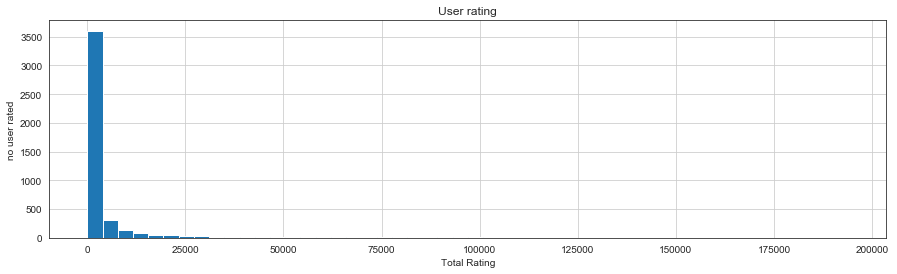

In [15]:
pyp.figure(figsize=(15,4))
pyp.title('User rating')
pyp.xlabel('Total Rating')
pyp.ylabel('no user rated')
ratings['num of ratings'].hist(bins=50)

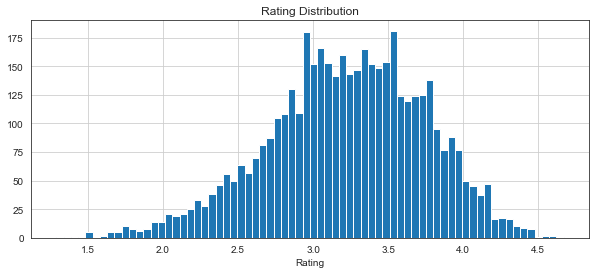

In [16]:
pyp.figure(figsize=(10,4))
pyp.title('Rating Distribution')
pyp.xlabel('Rating')
ratings['Rating'].hist(bins=70)

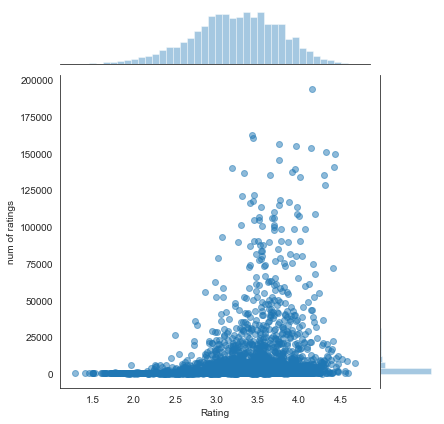

In [17]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

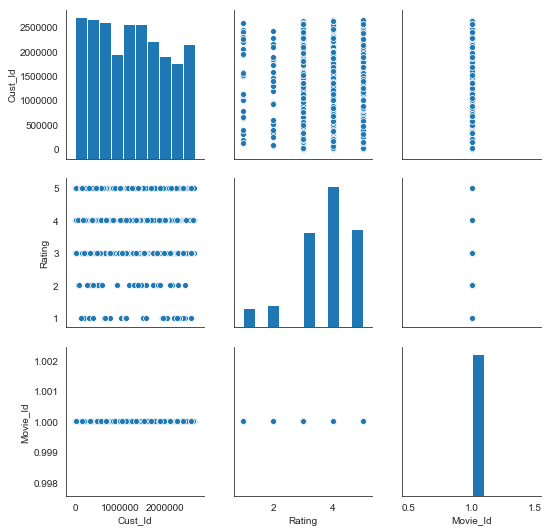

In [18]:
sns.pairplot(df.head(500))

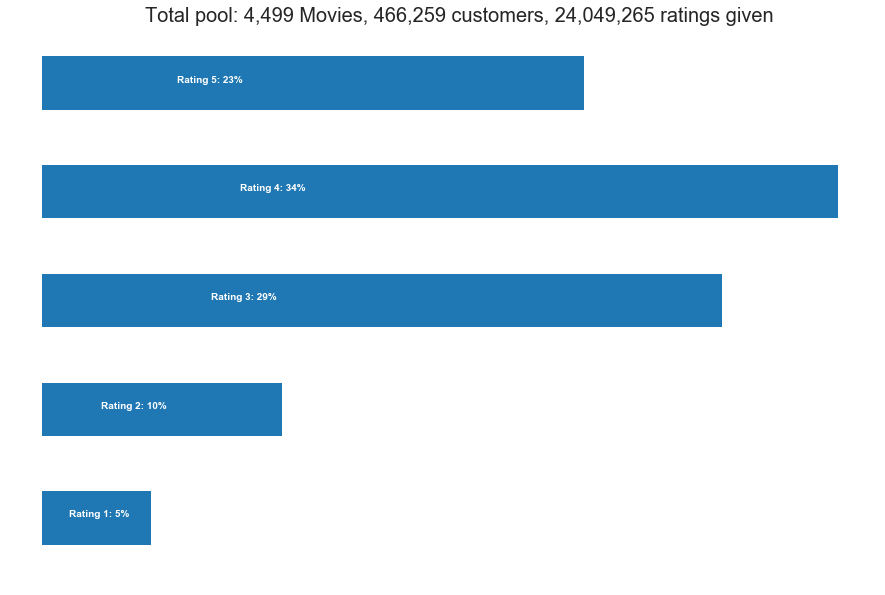

In [19]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.iloc[-1,-1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
pyp.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
pyp.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

# Getting Useful Data (Data Slicing)

The data set now is super huge. We can guess that the by applying following parameters we can significantly improve efficiency and reduce the dataset size with relatively important movies:

* Remove movie with too less ratings (they are relatively not popular)
* Remove customer who give too less ratings (they are relatively less active)

On experimenting a lot with the dataset we came across about the fact that the movies who got ratings less than 10K are relatively unpopular and can be removed from the working dataset

It can be implemented from the below code:

In [20]:
movie_summary = df.groupby('Movie_Id')['Rating'].agg(['count','mean'])
top_movies = movie_summary[movie_summary['count'] <10000].index

In [21]:
top_movies

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4489, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=4008)

In [22]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(top_movies)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::50000])

Original Shape: (24053764, 3)
After Trim Shape: (18867784, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
5106       824097     2.0         8
76919      219033     5.0        28
127444    1953087     3.0        30
177444    1213386     5.0        30
278464    1556692     3.0        58
364177    2515381     3.0       108
421724    2376898     5.0       118
494875    2144343     3.0       143
603577     331811     3.0       175
653577     730053     4.0       175
718274    1909349     5.0       191
768274    1394126     5.0       191
819661    1162869     4.0       197
869661    2457027     3.0       197
919857    2030979     5.0       199
1031333   1885310     4.0       241
1093453   2238663     4.0       252
1167620   2613456     5.0       269
1217621   1891473     3.0       270
1280664   1356095     5.0       285
1336670   1706276     5.0       290
1390718    662270     4.0       299
1440718    420970     3.0       299
1496965   1592086     5.0       311
1546966   2528094     

In [23]:
df.shape

(18867784, 3)

# Data Mapping

### Reading Movie_title dataset which will be merged with the dataset to get the name from movie ID

In [24]:
df_title = pd.read_csv(r'C:\Users\Raj\Desktop\NF Dataset\movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


#### Importing Surprise package for collaborating Filtering

In [25]:
from surprise import Reader,SVD,accuracy,Dataset

In [26]:
from surprise.model_selection import cross_validate,train_test_split

## we are gonna predict the the model with 75%train data and calculate RMSE and MAE
<i>RMSE stands for ROOT MEAN SQUARE ERROR and MAE stands for MEAN ABSOLUTE ERROR 

In [27]:
reader = Reader()

data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 1.0210
1.0210447579717523
MAE:  0.8093
0.8092621357630428


### Since we cannot calculate the accuracy as the recommendation is unsupervised and hence we will choose the algo with lower RMSE and MAE value
<strong> Cross Validate will apply the algo for cv=3 times and return the RMSE and MAE with fit time and test time
it is benificial to check the model thus created is feasible with time or not

In [28]:
cross_validate(algo,data, measures=['RMSE', 'MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0179  1.0220  1.0227  1.0209  0.0021  
MAE (testset)     0.8127  0.8191  0.8176  0.8165  0.0028  
Fit time          6.82    5.83    5.35    6.00    0.61    
Test time         0.27    0.25    0.25    0.26    0.01    


{'test_rmse': array([1.01791746, 1.02202238, 1.02272091]),
 'test_mae': array([0.81267925, 0.8191329 , 0.8176496 ]),
 'fit_time': (6.816389322280884, 5.829797267913818, 5.345332622528076),
 'test_time': (0.2695271968841553, 0.25396108627319336, 0.2539694309234619)}

Our Model(algo) will now be trained on full trainset

In [29]:
trainset_full = data.build_full_trainset()
algo.fit(trainset_full)

# Merging DataFrame and Movies Name using Movie ID as Index

In [30]:
df = pd.merge(df,df_title,on='Movie_Id')
df.head(5)

,Cust_Id,Rating,Movie_Id,Year,Name
0,824097,2.0,8,2004.0,What the #$*! Do We Know!?
1,2630686,5.0,8,2004.0,What the #$*! Do We Know!?
2,644003,3.0,8,2004.0,What the #$*! Do We Know!?
3,785314,1.0,8,2004.0,What the #$*! Do We Know!?
4,243963,3.0,8,2004.0,What the #$*! Do We Know!?


In [31]:
df.head(10)

,Cust_Id,Rating,Movie_Id,Year,Name
0,824097,2.0,8,2004.0,What the #$*! Do We Know!?
1,2630686,5.0,8,2004.0,What the #$*! Do We Know!?
2,644003,3.0,8,2004.0,What the #$*! Do We Know!?
3,785314,1.0,8,2004.0,What the #$*! Do We Know!?
4,243963,3.0,8,2004.0,What the #$*! Do We Know!?
5,229220,4.0,8,2004.0,What the #$*! Do We Know!?
6,1447783,4.0,8,2004.0,What the #$*! Do We Know!?
7,2580478,4.0,8,2004.0,What the #$*! Do We Know!?
8,2599087,3.0,8,2004.0,What the #$*! Do We Know!?
9,2352464,5.0,8,2004.0,What the #$*! Do We Know!?


<strong><i> definig user function which will take user id as input and return the watch history and based on the watch history the model will predict the next movies to watch

In [32]:
def user(user_id):
    #Creating watch history of the entered user rated more than 4 
    user_hist = df[(df['Cust_Id'] == user_id) & ((df['Rating'] == 5) | (df['Rating'] == 4 ))]
    user_hist = user_hist.join(df_title['Name'],rsuffix='_right')
    print("Top 3 Watch History \n \n \n",user_hist.head(3),"\n","\n")
    
    
    #creating recommend dataframe
    user_rec = df_title.copy()
    user_rec = user_rec.reset_index()
    user_rec = user_rec[~user_rec['Movie_Id'].isin(top_movies)]
    user_rec['Estimated_Score'] = user_rec['Movie_Id'].apply(lambda x: algo.predict(user_id, x).est)
    user_rec = user_rec.drop('Movie_Id', axis = 1)
    user_rec = user_rec.sort_values('Estimated_Score', ascending=False)
    print("Recommended Movies\n \n",user_rec.iloc[:,[0,2,1]].head(10))

In [33]:
user(2630686)

Top 3 Watch History 
 
 
          Cust_Id  Rating  Movie_Id    Year                           Name  \
1        2630686     5.0         8  2004.0     What the #$*! Do We Know!?   
1036829  2630686     4.0       299  2001.0          Bridget Jones's Diary   
2646748  2630686     5.0       658  1991.0  Robin Hood: Prince of Thieves   

              Name_right  
1        Dinosaur Planet  
1036829              NaN  
2646748              NaN   
 

Recommended Movies
 
          Year  Estimated_Score                        Name
7      2004.0         4.387463  What the #$*! Do We Know!?
27     2002.0         4.088455             Lilo and Stitch
29     2003.0         3.962146      Something's Gotta Give
17     1994.0         3.945326            Immortal Beloved
17768  2003.0         3.840736                 The Company
13174  1992.0         3.840736                  Rapid Fire
13176  2002.0         3.840736        CSI: Miami: Season 1
13177  1995.0         3.840736               Ulysses' Gaze


In [34]:
user(2473170)

Top 3 Watch History 
 
 
         Cust_Id  Rating  Movie_Id    Year                    Name Name_right
65385   2473170     5.0        30  2003.0  Something's Gotta Give        NaN
264050  2473170     5.0       111  2003.0     Duplex (Widescreen)        NaN
903344  2473170     4.0       273  2004.0                    Taxi        NaN 
 

Recommended Movies
 
          Year  Estimated_Score                        Name
27     2002.0         4.235052             Lilo and Stitch
29     2003.0         4.214337      Something's Gotta Give
17     1994.0         3.850789            Immortal Beloved
13188  2002.0         3.811862                      Cypher
13177  1995.0         3.811862               Ulysses' Gaze
13178  2002.0         3.811862         Monday Night Mayhem
13179  1998.0         3.811862                  Class Trip
13180  2002.0         3.811862         Murder in Greenwich
13181  1978.0         3.811862  Return from Witch Mountain
13182  1974.0         3.811862   Story of Jacob an

### Recommending Movies For user 2173336

In [35]:
user(2173336)

Top 3 Watch History 
 
 
          Cust_Id  Rating  Movie_Id    Year                    Name Name_right
65384    2173336     5.0        30  2003.0  Something's Gotta Give        NaN
1036494  2173336     4.0       299  2001.0   Bridget Jones's Diary        NaN
2352172  2173336     4.0       571  1999.0         American Beauty        NaN 
 

Recommended Movies
 
          Year  Estimated_Score                        Name
29     2003.0         3.795872      Something's Gotta Give
7      2004.0         3.793029  What the #$*! Do We Know!?
13188  2002.0         3.760926                      Cypher
13177  1995.0         3.760926               Ulysses' Gaze
13178  2002.0         3.760926         Monday Night Mayhem
13179  1998.0         3.760926                  Class Trip
13180  2002.0         3.760926         Murder in Greenwich
13181  1978.0         3.760926  Return from Witch Mountain
13182  1974.0         3.760926   Story of Jacob and Joseph
13183  1988.0         3.760926                

<h1>Using Correlation (with other movies based on customer ratings)<br>
 to map the similar recommended movies

In [36]:
movie_matrix = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')
print(movie_matrix.shape)

(465986, 491)


<b>WARNING:</b> Movie Matrix uses a lot of <i>RAM</i> if your system starts to crash then reduce the df size

In [37]:
movie_matrix.head()

Movie_Id,8,18,28,30,58,77,83,97,108,111,...,4392,4393,4402,4418,4420,4432,4472,4479,4488,4490
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN
7,5.0,NaN,4.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,5.0,3.0,5.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


<b>Defing recommend function which will take movie title and min no of times the movie should be rated as input and return the recommended movies based on that

In [38]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target =movie_matrix[i]
    similar_to_target = movie_matrix.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['Correlation'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('Correlation', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(movie_summary)[['Correlation', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

The lower values of count means the movie has not been rated by many users so that movie might not be popular so it is better to give high count values

In [39]:
recommend("Spartan", 1000)

For movie (Spartan)
- Top 10 movies recommended based on correlation - 
 Correlation                  Name  count      mean
    1.000000               Spartan  19018  3.167315
    0.276561    Cowboy Bebop Remix  10605  3.910891
    0.273098  The Spanish Prisoner  10585  3.604346
    0.268491   Surviving Christmas  20251  3.027406
    0.263951                 Below  11955  3.038394
    0.257037             Ned Kelly  10258  3.168746
    0.249745           A Man Apart  30958  3.379643
    0.249031               Hostage  48617  3.762758
    0.246580     Against the Ropes  15835  3.195895
    0.244077             The Alamo  27667  3.130733


Recommending movies similar to "Hostage" with user rated more than 1K

In [40]:
recommend("Hostage",1000)

For movie (Hostage)
- Top 10 movies recommended based on correlation - 
 Correlation                   Name  count      mean
    1.000000                Hostage  48617  3.762758
    0.444109   Domestic Disturbance  24127  3.525055
    0.430027  The Amityville Horror  19867  3.482408
    0.426663           Taking Lives  81260  3.478932
    0.425981         Chain Reaction  15966  3.188150
    0.417729            A Man Apart  30958  3.379643
    0.410270         Blade: Trinity  42727  3.548974
    0.409208                Trapped  18446  3.522498
    0.405285            Exit Wounds  28079  2.999145
    0.405050                   Taxi  32027  3.362475


In [41]:
recommend("What the #$*! Do We Know!?",0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on correlation - 
 Correlation                                          Name  count      mean
    1.000000                    What the #$*! Do We Know!?  14910  3.189805
    0.229485                                 Super Size Me  89865  3.863773
    0.222048                          Smallville: Season 1  10082  4.169609
    0.221503                                Love Potion #9  10894  3.202405
    0.217475                    A Love Song for Bobby Long  15915  3.556079
    0.217305                            Music of the Heart  10297  3.608041
    0.213540  Outfoxed: Rupert Murdoch's War on Journalism  11218  3.801836
    0.206379                                      Chocolat  13352  3.938511
    0.203717                                    Rising Sun  19960  3.425401
    0.202846                                  Control Room  15432  3.692392


<br><br><h1>-------------------------------END OF THE PROJECT--------------------------------------

In [42]:
df_title.shape

(17770, 2)